# Predicting Washington Public Bike Rentals

The dataset for this guided project is from Capital Bike Share, a bike sharing service in Washington. The dataset recorded the number of bikes rented each hour, if the renter was a casual user or registered, as well as weather data such as temperature and humidity.

The goal of this assignment was to practice using Linear Regression, Decision Trees, and Random Forests using the SKLearn machine learning library. 

We begin by loading in the data and doing some quick exploration.

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


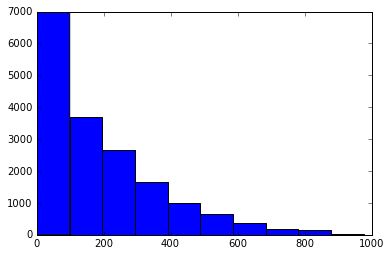

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64


In [16]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt


bike_rentals = pd.read_csv('bike_rental_hour.csv')
print(bike_rentals.head())

plt.hist(bike_rentals['cnt'])
plt.show()

print(bike_rentals.corr()['cnt'])


We will do some feature engineering before creating the machine learning models. We will collapse the 24 hour time period into 4 six-hour groups. 

In [17]:
# Creating (numeric) labels to divide the day into 4 parts
def assign_label(hour):
    if 0 <= hour < 6:
        return 4
    elif 6 <= hour < 12:
        return 1
    elif 12 <= hour < 18:
        return 2
    elif 18 <= hour <= 24:
        return 3
    
bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)

# Linear Regression
Before training the machine learning model, we will split the data into train and test sets. A list of features will be created from the columns of the bike rental dataset with our label ("cnt") and other useless features dropped. 

With the train and test sets ready and the features selected, the linear regression model can will then be created, trained, and tested. The error metric used for all the machine learning models in this assignment will be mean squared error.

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Creating a test and training set
train = bike_rentals.sample(frac=.8)
test = bike_rentals[~bike_rentals.index.isin(train.index)]

# Preparing the columns wanted for the regression
predictors = list(bike_rentals.columns)
predictors.remove("cnt")
predictors.remove("casual")
predictors.remove("registered")
predictors.remove("dteday")

lr = LinearRegression()
lr.fit(train[predictors], train['cnt'])
predictions = lr.predict(test[predictors])
mse = mean_squared_error(test['cnt'], predictions)
print('\n')
print("Mean Squared Error: ",mse)
print("Root Mean Squared Error: ", mse**.5)



Mean Squared Error:  16839.3444248
Root Mean Squared Error:  129.766499624


# Decision Trees
The train and test sets will now be applied to a decision tree model.  After the initial model is trained and tested, another decision tree will be modeled with some tinkering of the hyper-parameters with the hopes of tuning the model for more accuracy.

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score

# Instantiate a decision tree regressor. Train. Test. 
dt = DecisionTreeRegressor()
dt.fit(train[predictors], train['cnt'])
dt_predictions = dt.predict(test[predictors])

mse_dt = mean_squared_error(test['cnt'], dt_predictions)
print('\n')
print("Results of Decision Tree")
print("Mean Squared Error: ",mse_dt)
print("Root Mean Squared Error: ", mse_dt**.5)

# Tinker with the regressor to improve accuracy
dt = DecisionTreeRegressor(min_samples_leaf=15, max_depth=25)
dt.fit(train[predictors], train['cnt'])
dt_predictions = dt.predict(test[predictors])

mse_dt = mean_squared_error(test['cnt'], dt_predictions)
print('\n')
print("Result of Tweaked Decision Tree")
print("Mean Squared Error: ",mse_dt)
print("Root Mean Squared Error: ", mse_dt**.5)



Results of Decision Tree
Mean Squared Error:  3397.37974684
Root Mean Squared Error:  58.2870461324


Result of Tweaked Decision Tree
Mean Squared Error:  2969.13157616
Root Mean Squared Error:  54.4897382648


# Random Forests
Similiarly to the decision trees above, this random forest model will be created twice with the second iteration having it's hyper-parameters tuned. An added avenue of exploration here is using the trained model to test itself against the training data it saw while it was being fit. The difference or similarity between the error scores could be an indication that our model is overfitting. 

In [20]:
from sklearn.ensemble import RandomForestRegressor

# Create a random forest and fit it
rf = RandomForestRegressor()
rf.fit(train[predictors], train['cnt'])
# Create predictions on test data
rf_predictions = rf.predict(test[predictors])
mse_rf = mean_squared_error(test['cnt'], rf_predictions)
# Create predictions on training data to test for overfitting
rf_predictions_train = rf.predict(train[predictors])
mse_rf_training = mean_squared_error(train['cnt'], rf_predictions_train)
print('\n')
print("Result of Random Forest")
print("Predictions Using Test Data")
print("Mean Squared Error: ",mse_rf)
print("Root Mean Squared Error: ", mse_rf**.5)
print("Predictions Using Training Data")
print("Mean Squared Error: ",mse_rf_training)
print("Root Mean Squared Error: ", mse_rf_training**.5)

# Tweak the Random Forest 
rf = RandomForestRegressor(min_samples_leaf=27, max_depth=17)
rf.fit(train[predictors], train['cnt'])
rf_predictions = rf.predict(test[predictors])
mse_rf = mean_squared_error(test['cnt'], rf_predictions)
rf_predictions_train = rf.predict(train[predictors])
mse_rf_training = mean_squared_error(train['cnt'], rf_predictions_train)
        
print('\n')
print("Result of Tweaked Random Forest")
print("Predictions Using Test Data")
print("Mean Squared Error: ",mse_rf)
print("Root Mean Squared Error: ", mse_rf**.5)
print("Predictions Using Training Data")
print("Mean Squared Error: ",mse_rf_training)
print("Root Mean Squared Error: ", mse_rf_training**.5)



Result of Random Forest
Predictions Using Test Data
Mean Squared Error:  2071.95911105
Root Mean Squared Error:  45.5187775654
Predictions Using Training Data
Mean Squared Error:  342.400281954
Root Mean Squared Error:  18.5040612286


Result of Tweaked Random Forest
Predictions Using Test Data
Mean Squared Error:  3370.31828119
Root Mean Squared Error:  58.0544423898
Predictions Using Training Data
Mean Squared Error:  2747.28488927
Root Mean Squared Error:  52.4145484505


In conclusion we can see that the Random Forest algorithm outperformed both Linear Regression and the Decision Tree. Although the tweaked Random Forest performed worse, the result is not alarming. A better tuning could be found if extra time is spent tuning the hyper-parameters. 